Accuracy: 71
Accuracy: 68
Accuracy: 66
Accuracy: 71
Accuracy: 73
Accuracy: 66
Accuracy: 64
Accuracy: 69
Accuracy: 70


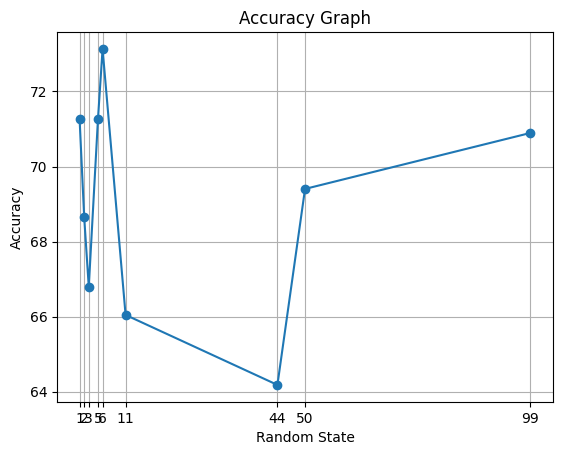

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

file = sns.load_dataset("titanic")

file = file[["pclass", "sex", "age", "sibsp", "parch", "fare", "embark_town","survived"]]

# Initialize SimpleImputer for categorical and numeric columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_imputer = SimpleImputer(strategy='mean')

# Replace missing values basically it's mean function
file[['sex', 'embark_town']] = categorical_imputer.fit_transform(file[['sex', 'embark_town']])
file[['age', 'fare']] = numeric_imputer.fit_transform(file[['age', 'fare']])

file['sex'] = file['sex'].map({'male': 0, 'female': 1})
town_mapping = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}
file['embark_town'] = file['embark_town'].map(town_mapping)

acc = []
X = file.drop(columns=["survived"])
y = file["survived"]
random_states = [1, 2,3,5,6,11,44,50,99]
for i in random_states:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Train the model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Make predictions
    y_predict = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_predict)
    accuracy *= 100
    print("Accuracy:", int(accuracy))
    acc.append(accuracy)

plt.plot(random_states, acc, marker='o')
plt.title('Accuracy Graph')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.xticks(random_states)
plt.grid(True)
plt.show()
